## Decision Tree Regression on Iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [21]:
iris_with_MV = pd.read_csv("../datasets/iris_with_MV.csv")
iris_org = pd.read_csv("../datasets/iris_data.csv")

In [22]:
mylist = iris_with_MV.columns[iris_with_MV.isnull().any()].tolist()

In [27]:
full_data = iris_with_MV.dropna()

In [38]:
y = full_data[mylist]

In [30]:
X = full_data.drop(mylist, axis=1)

In [37]:
X.shape[0]

128

In [43]:
assert(X.shape[0] == y.shape[0])

In [28]:
full_data.head(30)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa


In [6]:
clf = tree.DecisionTreeRegressor()

In [30]:
iris_with_MV['class_encoded'] = LabelEncoder().fit_transform(iris_with_MV['class'])

In [31]:
X_train = iris_with_MV.drop(['class'], axis=1).dropna()

In [32]:
y_train = X_train['petal length']
X_train = X_train.drop(['petal length'], axis=1)

In [33]:
clf = clf.fit(X_train, y_train)

[Text(131.25099489795917, 211.04470588235293, 'X[2] <= 0.8\nmse = 3.195\nsamples = 128\nvalue = 3.752'),
 Text(42.70408163265306, 198.25411764705882, 'X[0] <= 4.75\nmse = 0.027\nsamples = 44\nvalue = 1.475'),
 Text(17.764897959183674, 185.4635294117647, 'X[0] <= 4.35\nmse = 0.011\nsamples = 9\nvalue = 1.333'),
 Text(15.031836734693877, 172.6729411764706, 'mse = 0.0\nsamples = 1\nvalue = 1.1'),
 Text(20.49795918367347, 172.6729411764706, 'X[0] <= 4.55\nmse = 0.005\nsamples = 8\nvalue = 1.362'),
 Text(10.932244897959183, 159.88235294117646, 'X[1] <= 2.95\nmse = 0.002\nsamples = 4\nvalue = 1.325'),
 Text(5.466122448979592, 147.09176470588235, 'X[0] <= 4.45\nmse = 0.002\nsamples = 2\nvalue = 1.35'),
 Text(2.733061224489796, 134.30117647058825, 'mse = 0.0\nsamples = 1\nvalue = 1.4'),
 Text(8.199183673469388, 134.30117647058825, 'mse = -0.0\nsamples = 1\nvalue = 1.3'),
 Text(16.398367346938777, 147.09176470588235, 'X[1] <= 3.1\nmse = 0.0\nsamples = 2\nvalue = 1.3'),
 Text(13.665306122448978,

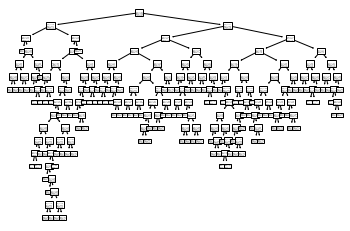

In [35]:
tree.plot_tree(clf)

Evaluate r2 score

In [45]:
iris_org['class'] = LabelEncoder().fit_transform(iris_org['class'])

In [46]:
idx = iris_with_MV.index[iris_with_MV['petal length'].isna()]

In [47]:
iris_org.iloc[idx]
y_test = iris_org.iloc[idx]['petal length']
X_test = iris_org.iloc[idx].drop(['petal length'], axis=1)

In [50]:
y_imputed = clf.predict(X_test)

In [51]:
r2_score(y_test, y_imputed)

0.9633211678832116

In [52]:
y_imputed

array([1.5, 1.7, 1.4, 1.4, 1.3, 1.5, 4.5, 4.1, 3. , 4.4, 4.7, 4.6, 3.5,
       4.5, 4.4, 4.7, 4. , 5.2, 6. , 5.8, 5.2, 5.1])

In [53]:
y_test

9      1.5
10     1.5
17     1.4
22     1.0
29     1.6
40     1.3
54     4.6
55     4.5
57     3.3
58     4.6
62     4.0
63     4.7
67     4.1
72     4.9
74     4.3
76     4.8
97     4.3
114    5.1
129    5.8
132    5.6
140    5.6
142    5.1
Name: petal length, dtype: float64